In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

In [3]:
#!nvidia-smi


zsh:1: command not found: nvidia-smi


In [2]:
fake_news = pd.read_csv("Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_news = pd.read_csv("True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Create a column with fake=1 in fake_news dataset
fake_news['fake']=1
fake_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
# Create a column with fake=0 in true_news dataset
true_news['fake'] = 0
true_news.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
# Concat two fake and true news
news = pd.concat([fake_news, true_news])
news.sample(5)

,title,text,subject,date,fake
13997,PRIORITIES: Obama Puts Illegals Before Social ...,Anyone who s been paying attention can tell yo...,politics,"May 2, 2016",1
22663,Reopen the Kurt Cobain Case? [POLL],21st Century Wire asks The tragic death of Kur...,US_News,"February 17, 2016",1
16204,Australia's Queensland calls snap election in ...,SYDNEY (Reuters) - Australia s Queensland stat...,worldnews,"October 29, 2017",0
12678,AN ELECTION WARNING EVERY AMERICAN SHOULD READ...,"As I ve said for years on radio, TV and in p...",politics,"Oct 20, 2016",1
11130,DOUBLE AMPUTEE VET Blasts Obama’s War Strategy...,War veteran Johnny Joey Jones praised Presid...,politics,"Apr 15, 2017",1


In [7]:
# Check for any null values
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

<AxesSubplot:xlabel='fake', ylabel='count'>

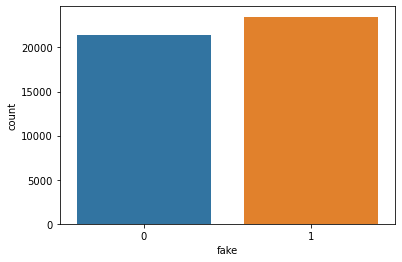

In [9]:
#### Explore the target variable
sns.countplot(x='fake', data=news)

In [10]:
# Explore 2 text for the fake dataset
news[news['fake']==1]['text'].head(2)

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
Name: text, dtype: object

<AxesSubplot:xlabel='subject', ylabel='count'>

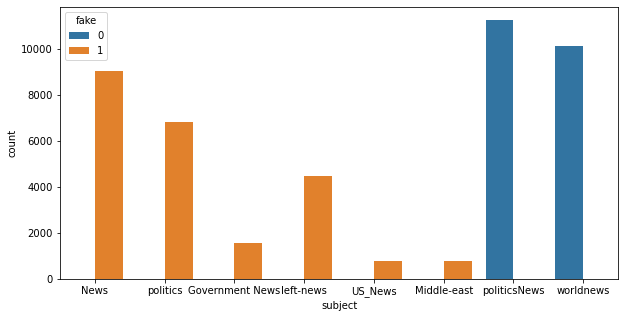

In [11]:
# Explore the subject column
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=news, hue='fake')

## Feature Engineering¶
We will create a new columns calld Month and Year from Date and Analyse whether 
fake or true news has some correlation with Month or Year in the timeline

In [12]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')
news['Year'] = news['date'].dt.year
news['Month'] = news['date'].dt.month

news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<AxesSubplot:xlabel='Year', ylabel='count'>

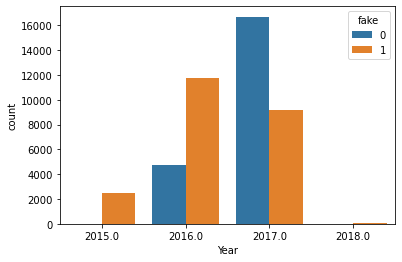

In [13]:
# check the impact of yead on tha target
sns.countplot(x='Year', data=news, hue='fake')

In [15]:
news['text'] = news['title'] + news['text']
news.drop(labels=['title'], axis=1,inplace=True)
news.head()

,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,1,2017.0,12.0


# Preparing the final data
We will remove the subject attribute - Since it perfectly distributes 
the target variable We will remove the Year attribute 
- This also has a clear division for the target variable We will remove the Month Attribute 
- This also has a very clear approach of demarcating the target variable

For now we will just go ahead with the "text attribute"

In [16]:
news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


## Split the dataset into training and testing

In [17]:
# We will shuffle the dataframe and extract the feature and label
news = news.sample(frac=1)
news.head()

,text,fake
5108,Rudy Giuliani: Trump Didn’t Say To Kill Hilla...,1
19615,China offers support for strife-torn Venezuela...,0
19195,RADICAL DIRECTOR OF SIERRA CLUB: Abortion is t...,1
5079,Highlights: The Trump presidency on March 7 at...,0
3547,Hillary Clinton attacks proposed Trump budget ...,0


In [18]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(news['text'].to_numpy(),
                                                                            news['fake'].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)


In [19]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(35918, 8980, 35918, 8980)

In [20]:
# Check the first 10 samples
train_sentences[:2], train_labels[:10]

(array(['DINGBAT NANCY STRIKES AGAIN! Watch Nancy Pelosi Refer To NRA As Part Of Intelligence Committee [VIDEO]Let s play a fun game called,  What the hell did Nancy just say? Every time Nancy opens her mouth, she proves that President Trump s election has caused her and her dingbat counterpart Rep. Maxine Waters to become completely unhinged.Here is the transcript from Nancy Pelosi s most recent appearance at the Peter G. Peterson Foundation s 2017 Fiscal Summit. Can someone please tell us exactly what Nancy is trying to say here? Talk about Russia s undermining our elections. They did it. Thisss .isss (mumble, mumble) isn t any question. They hacked, they leaked, they disrupted. The question is, was there collusion between the (mumble) campaign and the next. You can t know until you have the full-fledged (mumble mumble). To have a President say to the. If he did. To the uh director of the FBI or the DNI, the Director of National Intelligence, or the NRA .person that um uh that that u

## Converting text into numbers¶
When dealing with a text problem, one of the first things you'll have to do before you cna build a model is to covert your text to numbers.

There are a few ways to do this, namely:

Tokenization -direct mapping of token (a token could be a word or a character ) to a number.
Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned).

# Text Vectorization (tokenization

In [21]:
# find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

417

In [22]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 418


from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode='int',
                                   output_sequence_length=max_length)

In [23]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [24]:
# Create a sample sentences and tekenize it
sample_sentence = "Please Do Not Forget To Upvoted"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[1714,   91,   25, 2781,    3,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [25]:
# choose a random sentence from the training dataset and tokeize it
import random
random_sentence = random.choice(train_sentences)
print(f"Original text;\n{random_sentence}\
\n\n Vectorized Version:")
text_vectorizer([random_sentence])

Original text;
Trump, dogged at home, begins longest presidential Asia trip in yearsHONOLULU (Reuters) - President Donald Trump arrived in Hawaii on Friday as he set out on the longest trip to Asia by an American president in more than a quarter century, looking for help to pressure North Korea to stand down from a nuclear crisis. After Air Force One landed at Joint Base Hickam, Trump and his wife, Melania, were draped with traditional lei necklaces. Trump went on to nearby Camp Smith for a classified briefing from Pacific Command military leaders that officials expected would touch on North Korea and other areas. Later, he was to visit Pearl Harbor and the USS Arizona memorial for the U.S. sailors killed when Japan bombed the American naval base on Dec. 7, 1941. Trump s 12-day trip to Japan, South Korea, China, Vietnam and the Philippines, ending on Nov. 14, takes him out of Washington at a time when he has been beset by several issues. These include an intensifying federal investigat

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[  15, 6603,   27,  329, 3243, 6565,  137, 1632, 1118,    7,    1,
          69,   39,   70,   15, 1836,    7, 3452,    9,  210,   19,   13,
         379,   55,    9,    2, 6565, 1118,    3, 1632,   21,   32,  133,
          39,    7,   49,   78,    5, 3007,  773,  756,   10,  231,    3,
         814,  145,  232,    3,  684,  154,   26,    5,  273,  520,   51,
         486,  413,   54, 5828,   27, 1217, 1020,    1,   15,    6,   20,
         819, 2081,   47,    1,   17, 2408,    1,    1,   15,  373,    9,
           3, 2928, 1903, 2190,   10,    5, 1424, 1477,   26, 2643, 2578,
         167,  281,    8,  162,  436,   35, 3433,    9,  145,  232,    6,
          82,  972,  357,   13,   18,    3,  564, 9888, 6016,    6,    2,
        9501, 1630, 3342,   10,    2,   31, 7810,  346,   62, 1016, 8428,
           2,  133, 4432, 1020,    9, 1824, 1072,    1,   15,   11,    1,
        1118,    3, 1016,  271,  232,  217, 1733,    6,    2, 22

In [26]:
words = text_vectorizer.get_vocabulary()
len(words)

10000

# Creating an Embedding using an Embedding Layer
To make our embedding we're going to use TensorFlow's embedding layer

The parameters we care most about for our embedding layer:

- input_dim = the size of our vocabulary
- output_dim = the size of output embedding vector, 
  for example, a value of 100 would mean each token gets represented by a vector 100 long
- input_length = length of the sequences being passed to be embedding layer

In [27]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            input_length=max_length)
embedding

In [28]:
# Get a random sentence from the training set
random_sentenc = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedd version: ")
embedding(text_vectorizer([random_sentence]))

Original text:
Trump, dogged at home, begins longest presidential Asia trip in yearsHONOLULU (Reuters) - President Donald Trump arrived in Hawaii on Friday as he set out on the longest trip to Asia by an American president in more than a quarter century, looking for help to pressure North Korea to stand down from a nuclear crisis. After Air Force One landed at Joint Base Hickam, Trump and his wife, Melania, were draped with traditional lei necklaces. Trump went on to nearby Camp Smith for a classified briefing from Pacific Command military leaders that officials expected would touch on North Korea and other areas. Later, he was to visit Pearl Harbor and the USS Arizona memorial for the U.S. sailors killed when Japan bombed the American naval base on Dec. 7, 1941. Trump s 12-day trip to Japan, South Korea, China, Vietnam and the Philippines, ending on Nov. 14, takes him out of Washington at a time when he has been beset by several issues. These include an intensifying federal investigat

<tf.Tensor: shape=(1, 418, 128), dtype=float32, numpy=
array([[[-3.6284577e-02,  2.6802566e-02, -2.9766619e-02, ...,
         -3.3848539e-02,  7.3826425e-03,  3.4435678e-02],
        [-4.7455754e-02,  1.7596733e-02,  3.9457679e-03, ...,
          1.0899950e-02,  4.4775914e-02,  1.7007578e-02],
        [ 1.1038639e-02, -1.0514032e-02, -7.2458163e-03, ...,
          4.9691211e-02, -4.6857011e-02, -4.6142783e-02],
        ...,
        [-4.2384923e-02,  2.8087284e-02, -2.9486204e-02, ...,
         -1.4401328e-02,  6.0192458e-03,  8.7349042e-03],
        [-3.5853840e-02,  5.2007325e-03,  9.7731836e-03, ...,
         -2.7661776e-02, -4.6426725e-02,  2.1168534e-02],
        [ 5.2474439e-05, -2.4543822e-02,  2.0082701e-02, ...,
         -1.2007069e-02, -1.7852165e-02,  1.0801852e-02]]], dtype=float32)>

# Model
We will be using LSTM(long-short term memory) neural network.

In [29]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')

# Pass inputs to text_vectorizer(convert text into numbers)
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)


# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# Pass inputs and outputs to our model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [30]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 418)               0         
_________________________________________________________________
embedding (Embedding)        (None, 418, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [32]:
# Fit the model
model_history = model.fit(train_sentences,
                         train_labels,
                          epochs=5,
                         validation_data=(val_sentences, val_labels))


Epoch 1/5
1123/1123 [==============================] - 396s 350ms/step - loss: 0.5155 - accuracy: 0.7257 - val_loss: 0.2363 - val_accuracy: 0.9269
Epoch 2/5
1123/1123 [==============================] - 476s 424ms/step - loss: 0.2058 - accuracy: 0.9380 - val_loss: 0.1961 - val_accuracy: 0.9454
Epoch 3/5
1123/1123 [==============================] - 532s 473ms/step - loss: 0.2304 - accuracy: 0.9298 - val_loss: 0.1984 - val_accuracy: 0.9233
Epoch 4/5
1123/1123 [==============================] - 565s 504ms/step - loss: 0.1369 - accuracy: 0.9590 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 5/5
1123/1123 [==============================] - 546s 486ms/step - loss: 0.0329 - accuracy: 0.9903 - val_loss: 0.0342 - val_accuracy: 0.9906


# We got 99% accuracy on valid data

In [33]:
# Make predictions 
model_prediction = model.predict(val_sentences)
model_prediction[:10]

array([[6.6545606e-04],
       [1.2152493e-03],
       [9.9984300e-01],
       [9.9394214e-01],
       [9.9880469e-01],
       [2.0289719e-03],
       [3.3643860e-01],
       [1.4561772e-02],
       [1.0094941e-03],
       [9.9880457e-01]], dtype=float32)

In [34]:
# Convert model prediction to our val_labels
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 1., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [35]:
# Evaluatinon metrics
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

print(f"Accuracy Score: {accuracy_score(val_labels,model_preds)}")
print(f"Recall Score : {recall_score(val_labels, model_preds)}")
print(f"Precsion Score : {precision_score(val_labels, model_preds)}")
print(f"f1 Score : {f1_score(val_labels, model_preds)}")


Accuracy Score: 0.9906458797327394
Recall Score : 0.9920882781594836
Precsion Score : 0.9904385782581584
f1 Score : 0.9912627418348241


References for Feature Engineering and EDA: https://www.kaggle.com/suvofalcon/fake-real-news-tensorflow-hub-99-accuracy